## Logistic Regression using Gradient Descent
### Comparison with in-built Logistic Regression in Python

In [1]:
# import required Python libraries
import numpy as np
import pandas as pd
import random
import math

In [2]:
SAHeart_df = pd.read_csv('SAHeart.csv')

In [3]:
SAHeart_df.head(10)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


### Encoding the categorical variable

In [4]:
SAHeart_df['famhist'] = 1*pd.get_dummies(SAHeart_df['famhist']).Absent

In [5]:
SAHeart_df.head(10)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,0,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,1,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,0,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,0,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,0,69,30.11,0.00,53,1


In [6]:
X = (SAHeart_df[['famhist','sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']])

In [7]:
X[0:5]

,famhist,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,0,160,12.00,5.73,23.11,49,25.30,97.20,52
1,1,144,0.01,4.41,28.61,55,28.87,2.06,63
2,0,118,0.08,3.48,32.28,52,29.14,3.81,46
3,0,170,7.50,6.41,38.03,51,31.99,24.26,58
4,0,134,13.60,3.50,27.78,60,25.99,57.34,49


In [8]:
Y = np.array(SAHeart_df[['chd']])

In [9]:
cols_to_Normal = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']

X_new= X[cols_to_Normal]
X_new.head(10)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,49,25.30,97.20,52
1,144,0.01,4.41,28.61,55,28.87,2.06,63
2,118,0.08,3.48,32.28,52,29.14,3.81,46
3,170,7.50,6.41,38.03,51,31.99,24.26,58
4,134,13.60,3.50,27.78,60,25.99,57.34,49
5,132,6.20,6.47,36.21,62,30.77,14.14,45
6,142,4.05,3.38,16.20,59,20.81,2.62,38
7,114,4.08,4.59,14.60,62,23.11,6.72,58
8,114,0.00,3.83,19.40,49,24.86,2.49,29
9,132,0.00,5.80,30.96,69,30.11,0.00,53


In [10]:
X_new = X_new[cols_to_Normal].apply( lambda rec:(rec - rec.mean())/rec.std(), axis =0)

In [12]:
X_new[0:5]

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189,0.628654
1,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081,1.381617
2,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597,0.217947
3,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742,1.039361
4,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991,0.423301


In [11]:
X_new['famhist'] = SAHeart_df['famhist']

In [12]:
X_new[0:5]

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist
0,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189,0.628654,0
1,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081,1.381617,1
2,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597,0.217947,0
3,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742,1.039361,0
4,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991,0.423301,0


In [13]:
list(X_new)

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'typea',
 'obesity',
 'alcohol',
 'age',
 'famhist']

In [14]:
X_new = np.array(X_new)

In [15]:
X_new[0:5]

array([[ 1.05741729,  1.8210988 ,  0.47789413, -0.29518321, -0.41801699,
        -0.17659445,  3.27418871,  0.62865426,  0.        ],
       [ 0.27678925, -0.78938174, -0.15950708,  0.41169419,  0.19313443,
         0.67064592, -0.61208112,  1.38161701,  1.        ],
       [-0.99173133, -0.77414124, -0.6085852 ,  0.8833742 , -0.11244128,
         0.73472292, -0.54059729,  0.2179473 ,  0.        ],
       [ 1.54530982,  0.84135214,  0.80625232,  1.62238239, -0.21429985,
         1.41109128,  0.2947424 ,  1.03936121,  0.        ],
       [-0.21110328,  2.16945317, -0.59892761,  0.30501996,  0.70242729,
        -0.01284211,  1.64599115,  0.42330078,  0.        ]])

### Randomly initializing Theta values

In [17]:
def initialize_betas(dim):
    b = random.random()
    w = np.random.rand(dim)
    return b,w 

In [19]:
b,w = initialize_betas(X_new.shape[1])
print(b,w)

0.10954941835337395 [0.00810692 0.58401003 0.36101314 0.72606147 0.93562802 0.14925867
 0.35568936 0.41384808 0.69099717]


### Defining the Sigmoid function for pi(i)

In [20]:
def sigmoid(b, w ,X_new):
    Z = b + np.matmul(X_new,w)
    return (1.0 / (1 + np.exp(-Z)))  

In [21]:
y_hat = sigmoid(b,w,X_new)

y_hat[0:5]

array([0.89540323, 0.7717088 , 0.49336362, 0.93261307, 0.94245932])

In [77]:
Y[0:5]

array([[1],
       [1],
       [0],
       [1],
       [1]])

### Defining the cross-entropy function

In [22]:
def get_cost( y, y_hat):
      #return np.sum(np.dot(y.T,np.log(1-y_hat)+ np.dot((1-y).T,np.log(1-y_hat)))) / ( len(y))
        return - np.sum(np.dot(y.T,np.log(1-y_hat)+ np.dot((1-y).T,np.log(1-y_hat)))) / ( len(y))

In [23]:
current_cost= get_cost(Y,y_hat)

In [24]:
current_cost

110.79731275347805

In [83]:
Y.shape

(462, 1)

In [84]:
y_hat.shape

(462,)

### Defining a function to update the Theta values

In [26]:
def update_beta (b_0, w_0 , y , y_hat, X_new, alpha):
    db = np.sum( y_hat - y)/ len(y)
    b_0 = b_0 - alpha * db
    dw = np.dot((y_hat - y), X_new)/ len(y)
    w_0 = w_0 - alpha * dw
   
   
    return b_0,w_0

In [27]:
alpha = 0.1
b,w = update_beta (b,w, Y, y_hat,X_new, alpha)

### Code for gradient descent algorithm

In [28]:
num_iterations = 500
alpha = 0.5

all_costs = []
b,w = initialize_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

initial guess of b and w:  0.8312627910180954 [0.72567726 0.45073441 0.8140347  0.04487463 0.60746767 0.76560939
 0.94801605 0.70594527 0.23659401]


In [29]:
Y=Y.reshape(len(Y), )
for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , X_new)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, Y, y_hat, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1

print("Final estimates of b and q are: ", b,w)

Iteration:  0 Cost:  147.89924955668766
Iteration:  10 Cost:  57.60815648045445
Iteration:  20 Cost:  40.99158485988189
Iteration:  30 Cost:  37.910215657170816
Iteration:  40 Cost:  37.1321677391145
Iteration:  50 Cost:  36.884498900299526
Iteration:  60 Cost:  36.792457985881654
Iteration:  70 Cost:  36.75507086632985
Iteration:  80 Cost:  36.739964842039804
Iteration:  90 Cost:  36.73514034199429
Iteration:  100 Cost:  36.735486351034105
Iteration:  110 Cost:  36.73852809325664
Iteration:  120 Cost:  36.7429390828083
Iteration:  130 Cost:  36.747959800644736
Iteration:  140 Cost:  36.7531414044052
Iteration:  150 Cost:  36.75821829956294
Iteration:  160 Cost:  36.763037910151624
Iteration:  170 Cost:  36.76751891646027
Iteration:  180 Cost:  36.77162515520277
Iteration:  190 Cost:  36.77534882303861
Iteration:  200 Cost:  36.778699503283434
Iteration:  210 Cost:  36.78169696012023
Iteration:  220 Cost:  36.7843664185928
Iteration:  230 Cost:  36.78673550226272
Iteration:  240 Cost: 

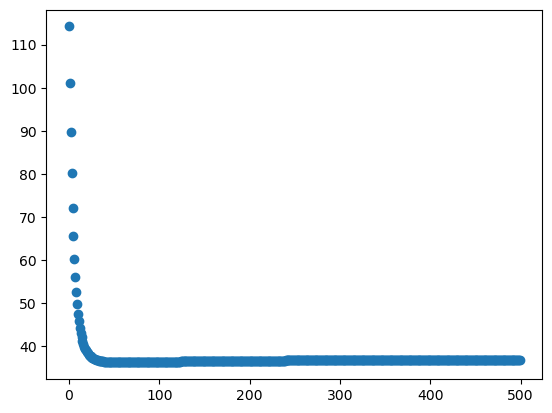

In [132]:
import matplotlib.pyplot as plt
plt.scatter(range(num_iterations), all_costs)

In [30]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lmodel = lreg.fit(X_new, Y)

In [32]:
lmodel.intercept_

array([-0.35563668])

In [33]:
lmodel.coef_

array([[ 0.13250588,  0.36074464,  0.3561588 ,  0.14243272,  0.37963858,
        -0.25523773,  0.00444212,  0.64962484, -0.88057699]])

In [140]:
b

-0.33812231571234175

In [141]:
w

array([ 0.13327074,  0.36450629,  0.36028358,  0.14369841,  0.3886992 ,
       -0.26441082,  0.00304902,  0.66123824, -0.9248188 ])

In [148]:
y_hat2 = sigmoid(lmodel.intercept_[0], lmodel.coef_[0] , X_new)
current_cost2 = get_cost (Y, y_hat)

In [149]:
current_cost2

36.80282765102549

### Plot the cost function for different alpha values, 1, 0.1, 0.01,0.001,0.0001 with suitable number of total iterations